# pandas 进阶修炼
<br>
本习题基于 `pandas` 版本 `1.1.3`，所有内容应当在 `Jupyter Notebook` 中执行以获得最佳效果。

不同版本之间写法可能会有少许不同，如若碰到此情况，你应该学会如何自行检索解决。

## 东京奥运会奖牌分析可视化


<br>

现在，让我们用一个简单的数据集来对之前的 pandas 操作。

本次实战将使用两份东京奥运会数据进行。

将以数据分析可视化为主题，涉及到几乎前面每个章节的内容。

为了方便大家理解题意，我将会保留部分习题的运行结果。


## 初始化

<br>

该 `Notebook` 版本为**习题+答案版**


请执行下方单元格以初始化读取本节习题的答案

执行完毕后，你可以使用 `ans(1)` 来查看第 1 题的参考解答，其余习题类似。

注意：所有答案并非固定（唯一），我提供的答案仅供参考（并非推荐答案或者最优解）

In [541]:
import sys
sys.path.append('../document/')
from init import initialize, ans
res = initialize("../document/answer-s3.txt")

***************正在初始化***************
*************读取到配置文件*************
***************初始化成功***************


## 数据加载与预处理

### 1 - 加载数据

读取当前目录下
- 东京奥运会奖牌数据.csv -> df1
- 东京奥运会奖牌分日数据.csv -> df2

In [1]:
import pandas as pd
df1 = pd.read_csv('./东京奥运会奖牌数据.csv')
df2 = pd.read_csv('./东京奥运会奖牌分日数据.csv')

In [16]:
df1.shape

(93, 9)

In [2]:
df1.head()

,排名,国家奥委会,Unnamed: 2,Unnamed: 3,Unnamed: 4,总分,按总数排名,国家奥委会代码,国家id
0,1,美国,39,41,33,113,1,USA,5
1,2,中国,38,32,18,88,2,CHN,26
2,3,日本,27,14,17,58,5,JPN,18
3,4,英国,22,21,22,65,4,GBR,211
4,5,ROC,20,28,23,71,3,ROC,23062


### 2- 修改列名

<br>

将原 `df1` 列名 `Unnamed: 2`、`Unnamed: 3`、`Unnamed: 4` 修改为 `金牌数`、`银牌数`、`铜牌数`

In [2]:
df1 = df1.rename(columns={'Unnamed: 2':'金牌数','Unnamed: 3':'银牌数','Unnamed: 4':'铜牌数'})

In [ ]:
df1.rename(columns={'Unnamed: 2':'金牌数',
                  'Unnamed: 3':'银牌数',
                  'Unnamed: 4':'铜牌数'},inplace=True) 

### 3 - 数据类型查看

查看 df2 的数据类型

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   获奖时间    1083 non-null   object
 1   奖牌类型    1083 non-null   int64 
 2   运动员     1083 non-null   object
 3   国家id    1083 non-null   int64 
 4   运动类别    1083 non-null   object
dtypes: int64(2), object(3)
memory usage: 42.4+ KB


In [6]:
df2.head()

,获奖时间,奖牌类型,运动员,国家id,运动类别
0,2021/8/8 16:44,1,塞尔维亚男子水球队,107,水球
1,2021/8/8 16:44,2,希腊男子水球队,171,水球
2,2021/8/8 15:34,1,法国女子手球队,144,手球
3,2021/8/8 15:34,2,俄奥委会女子手球队,23062,手球
4,2021/8/8 14:49,1,巴霍迪尔·贾洛洛夫,15,拳击


### 4 - 类型修改

将 df2 的获奖时间修改为 时间格式

In [3]:
df2['获奖时间'] = pd.to_datetime(df2['获奖时间'])

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   获奖时间    1083 non-null   datetime64[ns]
 1   奖牌类型    1083 non-null   int64         
 2   运动员     1083 non-null   object        
 3   国家id    1083 non-null   int64         
 4   运动类别    1083 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 42.4+ KB


### 5 - 数据排序

将 df2 按照获奖时间升序排列

In [14]:
df2 = df2.sort_values(by='获奖时间',ascending=True)

In [4]:
df2 = df2.sort_values(by=['获奖时间','奖牌类型'], ascending=True, ignore_index=True)

### 6 - 匹配修改

给 df2 新增一列国家，总奖牌数，值根据 国家id 与 df1 匹配

注意：原始数据可能有一点问题，射击队杨倩应该是东京首金

In [5]:
# 答案
temp = pd.merge(df1,df2,on = '国家id') #先合并
temp['获奖时间'] = pd.to_datetime(temp['获奖时间'])#修改类型
temp = temp.sort_values(by=['获奖时间','奖牌类型'], ascending=True, ignore_index=True)#排序，和df2一样
df2['国家'] = temp['国家奥委会']#赋值

In [19]:
# 自己的方法
df2 = df2.merge(df1[['国家id','国家奥委会','总分']],on='国家id').rename(columns={'国家奥委会':'国家','总分':'总奖牌数'})

In [20]:
df2.head()

,获奖时间,奖牌类型,运动员,国家id,运动类别,国家,总奖牌数
0,2021-07-24 00:00:00,3,亚力杭德拉·瓦伦西亚/路易斯·阿尔瓦雷斯,156,射箭,墨西哥,4
1,2021-07-27 00:00:00,3,亚历杭德拉·奥罗斯科·罗萨/加布里埃拉·阿贡德斯·加西亚,156,跳水,墨西哥,4
2,2021-08-01 20:39:00,3,阿雷米·富恩特斯,156,举重,墨西哥,4
3,2021-08-06 19:04:00,3,墨西哥男子足球队,156,足球,墨西哥,4
4,2021-07-24 00:00:00,2,史蒂夫·维勒等,1,射箭,荷兰,36


## 数据分析

### 7 - 分组统计

通过对 df2 的国家进行分组统计，计算每个国家的奖牌总数（也就是出现次数）

并查看奖牌数前5名，结果可以用 df1 进行验证

In [22]:
# 解
df2[['国家','奖牌类型']].groupby('国家').count().sort_values(by='奖牌类型',ascending=False)

,奖牌类型
国家,
美国,113
中国,88
ROC,71
英国,65
日本,58
...,...
百慕大,1
格林纳达,1
纳米比亚,1


In [140]:
#答案
df2.groupby("国家")['奖牌类型'].count().sort_values(ascending=False).head(5)

国家
美国     113
中国      88
ROC     71
英国      65
日本      58
Name: 奖牌类型, dtype: int64

### 8 - 数据统计

通过 df2 计算获得奖牌最多的运动员

注意：仅统计单人项目

In [23]:
# 解
df2[['运动员','奖牌类型']].groupby('运动员').count().sort_values(by='奖牌类型',ascending=False)

,奖牌类型
运动员,
塞勒博·德雷赛尔,3
张雨霏,2
肖若腾,2
大卫·尼卡,2
桥本大辉,2
...,...
尼拉吉·秋普拉,1
尼科拉·麦克德莫特,1
尼科洛·马丁宁吉,1


In [141]:
# 答案
df2['运动员'].value_counts().sort_values(ascending=False).head(5)

塞勒博·德雷赛尔     3
大桥悠依         2
克里斯托夫·米拉克    2
阿里亚妮·蒂特马斯    2
邓肯·斯科特       2
Name: 运动员, dtype: int64

### 9 - 数据查看

查看乒乓球项目的全部信息

In [24]:
# 解
df2[df2['运动类别']=='乒乓球']

,获奖时间,奖牌类型,运动员,国家id,运动类别,国家,总奖牌数
77,2021-07-26 22:00:00,2,许昕/刘诗雯,26,乒乓球,中国,88
89,2021-07-29 21:10:00,2,孙颖莎,26,乒乓球,中国,88
90,2021-07-29 21:10:00,1,陈梦,26,乒乓球,中国,88
98,2021-07-30 21:29:00,2,樊振东,26,乒乓球,中国,88
99,2021-07-30 21:29:00,1,马龙,26,乒乓球,中国,88
133,2021-08-05 20:34:00,1,陈梦/王曼昱/孙颖莎,26,乒乓球,中国,88
137,2021-08-06 20:40:00,1,马龙/许昕/樊振东,26,乒乓球,中国,88
359,2021-07-26 00:00:00,3,林昀儒/郑怡静,31,乒乓球,中华台北,12
411,2021-07-26 22:00:00,1,水谷隼/伊藤美诚,18,乒乓球,日本,58
423,2021-07-29 20:02:00,3,伊藤美诚,18,乒乓球,日本,58


### 10 - 数据透视

查看各国在不同项目上的获奖牌情况

https://zhuanlan.zhihu.com/p/101677743

In [25]:
# 解1
pd.pivot_table(df2,index=['国家','奖牌类型'],values=['总奖牌数'],columns=['运动类别'],aggfunc='count')

总奖牌数                                                ...            \
运动类别      七人制橄榄球 三人篮球   举重 乒乓球 公路自行车  冲浪   击剑 古典式摔跤 场地自行车赛  垒球  ...  跆拳道   跳水   
国家   奖牌类型                                                       ...             
ROC  1       NaN  NaN  NaN NaN   NaN NaN  3.0   1.0    NaN NaN  ...  2.0  NaN   
     2       NaN  2.0  NaN NaN   NaN NaN  4.0   NaN    NaN NaN  ...  1.0  NaN   
     3       NaN  NaN  NaN NaN   NaN NaN  1.0   2.0    2.0 NaN  ...  1.0  1.0   
中华台北 1       NaN  NaN  1.0 NaN   NaN NaN  NaN   NaN    NaN NaN  ...  NaN  NaN   
     2       NaN  NaN  NaN NaN   NaN NaN  NaN   NaN    NaN NaN  ...  NaN  NaN   
...          ...  ...  ...  ..   ...  ..  ...   ...    ...  ..  ...  ...  ...   
韩国   1       NaN  NaN  NaN NaN   NaN NaN  1.0   NaN    NaN NaN  ...  NaN  NaN   
     2       NaN  NaN  NaN NaN   NaN NaN  1.0   NaN    NaN NaN  ...  1.0  NaN   
     3       NaN  NaN  NaN NaN   NaN NaN  3.0   NaN    NaN NaN  ...  2.0  NaN   
马来西亚 2       NaN  NaN  NaN NaN   NaN NaN  NaN   NaN    1.0 NaN  ...  NaN  NaN   
     3       NaN  NaN  NaN NaN   NaN NaN  NaN   NaN    NaN NaN  ...  NaN  NaN   

                                                           
运动类别      蹦床体操 铁人三项 静水皮划艇 马拉松游泳 马术-三项赛 马术-盛装舞步 马术-障碍赛 高尔夫  
国家   奖牌类型                                                  
ROC  1     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
     2     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
     3     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
中华台北 1     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
     2     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
...        ...  ...   ...   ...    ...     ...    ...  ..  
韩国   1     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
     2     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
     3     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
马来西亚 2     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  
     3     NaN  NaN   NaN   NaN    NaN     NaN    NaN NaN  

[210 rows x 50 columns]

In [27]:
# 解2
pd.pivot_table(df2,values = ['总奖牌数'],index = ['国家','运动类别'],columns=['奖牌类型'],aggfunc = 'count')

总奖牌数          
奖牌类型           1    2    3
国家   运动类别                 
ROC  三人篮球    NaN  2.0  NaN
     击剑      3.0  4.0  1.0
     古典式摔跤   1.0  NaN  2.0
     场地自行车赛  NaN  NaN  2.0
     射击      2.0  4.0  2.0
...          ...  ...  ...
韩国   竞技体操    1.0  NaN  1.0
     羽毛球     NaN  NaN  1.0
     跆拳道     NaN  1.0  2.0
马来西亚 场地自行车赛  NaN  1.0  NaN
     羽毛球     NaN  NaN  1.0

[516 rows x 3 columns]

In [26]:
# 答案
result = pd.pivot_table(df2,values = ['奖牌类型'],index = ['国家','运动类别'],aggfunc = 'count')
result

奖牌类型
国家   运动类别        
ROC  三人篮球       2
     击剑         8
     古典式摔跤      3
     场地自行车赛     2
     射击         8
...           ...
韩国   竞技体操       2
     羽毛球        1
     跆拳道        3
马来西亚 场地自行车赛     1
     羽毛球        1

[516 rows x 1 columns]

### 11 - 数据查询

在上一题的基础上，查询中国队的获奖牌详情

In [ ]:
# 解
result[result['国家']=='中国']# 失败做法

In [29]:
result.query("国家 == ['中国']")

奖牌类型
国家 运动类别        
中国 三人篮球       1
   举重         8
   乒乓球        7
   击剑         1
   古典式摔跤      1
   场地自行车赛     1
   射击        11
   帆船         2
   拳击         2
   游泳         6
   田径         5
   空手道        2
   竞技体操       8
   羽毛球        6
   自由式摔跤      3
   花样游泳       2
   赛艇         3
   跆拳道        1
   跳水        12
   蹦床体操       3
   静水皮划艇      3

### 12 - 个性化查看

在数据框中根据奖牌数量进行可视化

In [31]:
# 答案
(result.query("国家 == ['中国']")
.style
.bar(subset=['奖牌类型'],color='skyblue'))

### 13 - 数据格式化

将 df2 的获奖时间格式化为 x月x日

In [51]:
# 答案
def time_format(x):
    
    return x.strftime("%m月%d日")

df2['获奖时间'] = df2['获奖时间'].map(time_format)
df2.head()

,获奖时间,奖牌类型,运动员,国家id,运动类别,国家
0,07月24日,1,安山/金智德,106,射箭,韩国
1,07月24日,2,史蒂夫·维勒等,1,射箭,荷兰
2,07月24日,3,亚力杭德拉·瓦伦西亚/路易斯·阿尔瓦雷斯,156,射箭,墨西哥
3,07月24日,1,杨倩,26,射击,中国
4,07月24日,2,阿纳斯塔西娅·加拉西娜,23062,射击,ROC


### 14 - 分组统计

查看每天产生奖牌的数量

In [34]:
df2[['获奖时间','奖牌类型']].groupby('获奖时间').count().sort_values(by='奖牌类型',ascending=False)

,奖牌类型
获奖时间,
08月07日,103
08月05日,95
08月03日,81
08月06日,80
08月01日,76
07月27日,71
07月28日,71
07月31日,70
07月26日,68


### 15 - 数据透视

查看不同项目在不同国家的分布情况

In [38]:
# 解
df2[['运动类别','国家','奖牌类型']].groupby(['运动类别','国家']).count()#.sort_values(by='奖牌类型',ascending=False)

奖牌类型
运动类别   国家        
七人制橄榄球 斐济       2
       新西兰      2
       法国       1
       阿根廷      1
三人篮球   ROC      2
...           ...
高尔夫    中华台北     1
       斯洛伐克     1
       新西兰      1
       日本       1
       美国       2

[516 rows x 1 columns]

In [178]:
# 答案
pd.pivot_table(df2,values = ['奖牌类型'],index = ['运动类别','国家'],aggfunc = 'count')

奖牌类型
运动类别   国家        
七人制橄榄球 斐济       2
       新西兰      2
       法国       1
       阿根廷      1
三人篮球   ROC      2
...           ...
高尔夫    中华台北     1
       斯洛伐克     1
       新西兰      1
       日本       1
       美国       2

[548 rows x 1 columns]

### 16 - 数据计算

计算中国每日总奖牌数量

In [45]:
# 解：排序方法
df2[['获奖时间','国家','奖牌类型']].groupby(['获奖时间','国家']).count()

奖牌类型
获奖时间   国家        
07月24日 ROC      2
       中华台北     1
       中国       4
       乌克兰      1
       以色列      1
...           ...
08月08日 美国       5
       肯尼亚      1
       英国       2
       荷兰       3
       马来西亚     1

[502 rows x 1 columns]

In [46]:
# 解：透视方法
pd.pivot_table(df2,index=['获奖时间','国家'],values=['奖牌类型'],aggfunc=['count'])

count
             奖牌类型
获奖时间   国家        
07月24日 ROC      2
       中华台北     1
       中国       4
       乌克兰      1
       以色列      1
...           ...
08月08日 美国       5
       肯尼亚      1
       英国       2
       荷兰       3
       马来西亚     1

[502 rows x 1 columns]

In [43]:
pd.pivot_table(df2,index=['获奖时间','国家'],values=['奖牌类型'],aggfunc=['count']).query("国家==['中国']")#.cumsum()

,,count
,,奖牌类型
获奖时间,国家,
07月24日,中国,4
07月25日,中国,7
07月26日,中国,7
07月27日,中国,3
07月28日,中国,6
07月29日,中国,4
07月30日,中国,9
07月31日,中国,6


In [44]:
# 答案
pd.pivot_table(df2,index=['获奖时间','国家'],values=['奖牌类型'],aggfunc=['count']).query("国家==['中国']").cumsum()

,,count
,,奖牌类型
获奖时间,国家,
07月24日,中国,4
07月25日,中国,11
07月26日,中国,18
07月27日,中国,21
07月28日,中国,27
07月29日,中国,31
07月30日,中国,40
07月31日,中国,46


### 17 - 数据计算

计算前十名各国每日奖牌数量合计

注意：对于第一天没有数据的国家用0填充，其余时间的缺失值用上一日数据填充

In [6]:
data = pd.pivot_table(df2,values = ['奖牌类型'],
                        index = ['获奖时间','国家'],
                        aggfunc = 'count').query("国家 == ['美国', '中国', '日本', '英国', 'ROC', '澳大利亚', '荷兰', '法国', '德国', '意大利']")
data

奖牌类型
获奖时间                国家       
2021-07-24 00:00:00 荷兰      1
2021-07-24 07:30:00 ROC     1
                    中国      1
2021-07-24 08:30:00 意大利     1
2021-07-24 08:50:00 中国      1
...                       ...
2021-08-08 14:10:00 中国      1
2021-08-08 14:13:00 英国      1
2021-08-08 14:49:00 美国      1
2021-08-08 15:34:00 ROC     1
                    法国      1

[540 rows x 1 columns]

https://towardsdatascience.com/reshaping-a-dataframe-with-pandas-stack-and-unstack-925dc9ce1289

In [7]:
data = data.unstack()
data

奖牌类型                                           
国家                    荷兰  ROC   中国  意大利  日本   法国 澳大利亚   美国   英国  德国
获奖时间                                                               
2021-07-24 00:00:00  1.0  NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN NaN
2021-07-24 07:30:00  NaN  1.0  1.0  NaN NaN  NaN  NaN  NaN  NaN NaN
2021-07-24 08:30:00  NaN  NaN  NaN  1.0 NaN  NaN  NaN  NaN  NaN NaN
2021-07-24 08:50:00  NaN  NaN  1.0  NaN NaN  NaN  NaN  NaN  NaN NaN
2021-07-24 09:28:00  NaN  1.0  NaN  1.0 NaN  NaN  NaN  NaN  NaN NaN
...                  ...  ...  ...  ...  ..  ...  ...  ...  ...  ..
2021-08-08 14:07:00  NaN  NaN  NaN  NaN NaN  NaN  NaN  1.0  NaN NaN
2021-08-08 14:10:00  NaN  NaN  1.0  NaN NaN  NaN  NaN  NaN  NaN NaN
2021-08-08 14:13:00  NaN  NaN  NaN  NaN NaN  NaN  NaN  NaN  1.0 NaN
2021-08-08 14:49:00  NaN  NaN  NaN  NaN NaN  NaN  NaN  1.0  NaN NaN
2021-08-08 15:34:00  NaN  1.0  NaN  NaN NaN  1.0  NaN  NaN  NaN NaN

[366 rows x 10 columns]

In [56]:
#data.index
data.columns# 取列名索引

MultiIndex([('奖牌类型',  'ROC'),
            ('奖牌类型',   '中国'),
            ('奖牌类型',  '意大利'),
            ('奖牌类型',   '日本'),
            ('奖牌类型',   '荷兰'),
            ('奖牌类型',   '德国'),
            ('奖牌类型',   '法国'),
            ('奖牌类型', '澳大利亚'),
            ('奖牌类型',   '美国'),
            ('奖牌类型',   '英国')],
           names=[None, '国家'])

In [8]:
data.columns.get_level_values(1)

Index(['荷兰', 'ROC', '中国', '意大利', '日本', '法国', '澳大利亚', '美国', '英国', '德国'], dtype='object', name='国家')

In [9]:
data.columns.get_level_values(0)

Index(['奖牌类型', '奖牌类型', '奖牌类型', '奖牌类型', '奖牌类型', '奖牌类型', '奖牌类型', '奖牌类型', '奖牌类型',
       '奖牌类型'],
      dtype='object')

In [65]:
data.columns = data.columns.get_level_values(1) # https://vimsky.com/zh-tw/examples/usage/python-pandas.Index.get_level_values.html
data.columns

Index(['ROC', '中国', '意大利', '日本', '荷兰', '德国', '法国', '澳大利亚', '美国', '英国'], dtype='object', name='国家')

In [66]:
data

国家,ROC,中国,意大利,日本,荷兰,德国,法国,澳大利亚,美国,英国
获奖时间,,,,,,,,,,
07月24日,2.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
07月25日,5.0,7.0,3.0,4.0,1.0,2.0,3.0,3.0,9.0,2.0
07月26日,5.0,7.0,4.0,8.0,1.0,1.0,2.0,3.0,5.0,5.0
07月27日,6.0,3.0,3.0,5.0,NaN,2.0,2.0,3.0,11.0,6.0
07月28日,5.0,6.0,3.0,4.0,8.0,5.0,1.0,7.0,6.0,3.0
07月29日,5.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,7.0,2.0
07月30日,6.0,9.0,1.0,3.0,2.0,3.0,2.0,2.0,3.0,6.0
07月31日,3.0,6.0,4.0,2.0,1.0,1.0,6.0,5.0,5.0,4.0
08月01日,7.0,5.0,3.0,1.0,1.0,2.0,2.0,4.0,13.0,4.0


In [67]:
data.columns.name = None
data

,ROC,中国,意大利,日本,荷兰,德国,法国,澳大利亚,美国,英国
获奖时间,,,,,,,,,,
07月24日,2.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
07月25日,5.0,7.0,3.0,4.0,1.0,2.0,3.0,3.0,9.0,2.0
07月26日,5.0,7.0,4.0,8.0,1.0,1.0,2.0,3.0,5.0,5.0
07月27日,6.0,3.0,3.0,5.0,NaN,2.0,2.0,3.0,11.0,6.0
07月28日,5.0,6.0,3.0,4.0,8.0,5.0,1.0,7.0,6.0,3.0
07月29日,5.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,7.0,2.0
07月30日,6.0,9.0,1.0,3.0,2.0,3.0,2.0,2.0,3.0,6.0
07月31日,3.0,6.0,4.0,2.0,1.0,1.0,6.0,5.0,5.0,4.0
08月01日,7.0,5.0,3.0,1.0,1.0,2.0,2.0,4.0,13.0,4.0


In [68]:
data = data.cumsum() # 按顺序逐渐累加
data

,ROC,中国,意大利,日本,荷兰,德国,法国,澳大利亚,美国,英国
获奖时间,,,,,,,,,,
07月24日,2.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
07月25日,7.0,11.0,5.0,5.0,2.0,2.0,3.0,3.0,9.0,2.0
07月26日,12.0,18.0,9.0,13.0,3.0,3.0,5.0,6.0,14.0,7.0
07月27日,18.0,21.0,12.0,18.0,NaN,5.0,7.0,9.0,25.0,13.0
07月28日,23.0,27.0,15.0,22.0,11.0,10.0,8.0,16.0,31.0,16.0
07月29日,28.0,31.0,19.0,25.0,13.0,13.0,11.0,20.0,38.0,18.0
07月30日,34.0,40.0,20.0,28.0,15.0,16.0,13.0,22.0,41.0,24.0
07月31日,37.0,46.0,24.0,30.0,16.0,17.0,19.0,27.0,46.0,28.0
08月01日,44.0,51.0,27.0,31.0,17.0,19.0,21.0,31.0,59.0,32.0


- method参数的取值 ： {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None

    - pad/ffill：用前一个非缺失值去填充该缺失值

    - backfill/bfill：用下一个非缺失值填充该缺失值

    - None：指定一个值去替换缺失值（缺省默认这种方式）


In [72]:
data.fillna(axis=0,method='ffill') # 用前一个非空值填充空值

,ROC,中国,意大利,日本,荷兰,德国,法国,澳大利亚,美国,英国
获奖时间,,,,,,,,,,
07月24日,2.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
07月25日,7.0,11.0,5.0,5.0,2.0,2.0,3.0,3.0,9.0,2.0
07月26日,12.0,18.0,9.0,13.0,3.0,3.0,5.0,6.0,14.0,7.0
07月27日,18.0,21.0,12.0,18.0,3.0,5.0,7.0,9.0,25.0,13.0
07月28日,23.0,27.0,15.0,22.0,11.0,10.0,8.0,16.0,31.0,16.0
07月29日,28.0,31.0,19.0,25.0,13.0,13.0,11.0,20.0,38.0,18.0
07月30日,34.0,40.0,20.0,28.0,15.0,16.0,13.0,22.0,41.0,24.0
07月31日,37.0,46.0,24.0,30.0,16.0,17.0,19.0,27.0,46.0,28.0
08月01日,44.0,51.0,27.0,31.0,17.0,19.0,21.0,31.0,59.0,32.0


In [70]:
data.fillna(axis=0,method='ffill').fillna(0)

,ROC,中国,意大利,日本,荷兰,德国,法国,澳大利亚,美国,英国
获奖时间,,,,,,,,,,
07月24日,2.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
07月25日,7.0,11.0,5.0,5.0,2.0,2.0,3.0,3.0,9.0,2.0
07月26日,12.0,18.0,9.0,13.0,3.0,3.0,5.0,6.0,14.0,7.0
07月27日,18.0,21.0,12.0,18.0,3.0,5.0,7.0,9.0,25.0,13.0
07月28日,23.0,27.0,15.0,22.0,11.0,10.0,8.0,16.0,31.0,16.0
07月29日,28.0,31.0,19.0,25.0,13.0,13.0,11.0,20.0,38.0,18.0
07月30日,34.0,40.0,20.0,28.0,15.0,16.0,13.0,22.0,41.0,24.0
07月31日,37.0,46.0,24.0,30.0,16.0,17.0,19.0,27.0,46.0,28.0
08月01日,44.0,51.0,27.0,31.0,17.0,19.0,21.0,31.0,59.0,32.0


In [74]:
data = pd.pivot_table(df2,values = ['奖牌类型'],
                        index = ['获奖时间','国家'],
                        aggfunc = 'count').query("国家 == ['美国', '中国', '日本', '英国', 'ROC', '澳大利亚', '荷兰', '法国', '德国', '意大利']")
# 重塑形
data = data.unstack()
# 改名
data.columns = data.columns.get_level_values(1)
data.columns.name = None
# 逐步累加
data = data.cumsum()
# 填充
data = data.fillna(axis=0,method='ffill').fillna(0)
data

,ROC,中国,意大利,日本,荷兰,德国,法国,澳大利亚,美国,英国
获奖时间,,,,,,,,,,
07月24日,2.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
07月25日,7.0,11.0,5.0,5.0,2.0,2.0,3.0,3.0,9.0,2.0
07月26日,12.0,18.0,9.0,13.0,3.0,3.0,5.0,6.0,14.0,7.0
07月27日,18.0,21.0,12.0,18.0,3.0,5.0,7.0,9.0,25.0,13.0
07月28日,23.0,27.0,15.0,22.0,11.0,10.0,8.0,16.0,31.0,16.0
07月29日,28.0,31.0,19.0,25.0,13.0,13.0,11.0,20.0,38.0,18.0
07月30日,34.0,40.0,20.0,28.0,15.0,16.0,13.0,22.0,41.0,24.0
07月31日,37.0,46.0,24.0,30.0,16.0,17.0,19.0,27.0,46.0,28.0
08月01日,44.0,51.0,27.0,31.0,17.0,19.0,21.0,31.0,59.0,32.0


## 数据可视化

下面是一些数据可视化的操作

由于部分是之前未涉及的内容，所以以下全部习题我将保留答案。也不可使用 ans 查看答案

### 18 - 条形图

对金牌数量排行前10的国家制作条形图

In [75]:
df1.head(10)

,排名,国家奥委会,金牌数,银牌数,铜牌数,总分,按总数排名,国家奥委会代码,国家id
0,1,美国,39,41,33,113,1,USA,5
1,2,中国,38,32,18,88,2,CHN,26
2,3,日本,27,14,17,58,5,JPN,18
3,4,英国,22,21,22,65,4,GBR,211
4,5,ROC,20,28,23,71,3,ROC,23062
5,6,澳大利亚,17,7,22,46,6,AUS,157
6,7,荷兰,10,12,14,36,9,NED,1
7,8,法国,10,12,11,33,10,FRA,144
8,9,德国,10,11,16,37,8,GER,2
9,10,意大利,10,10,20,40,7,ITA,6


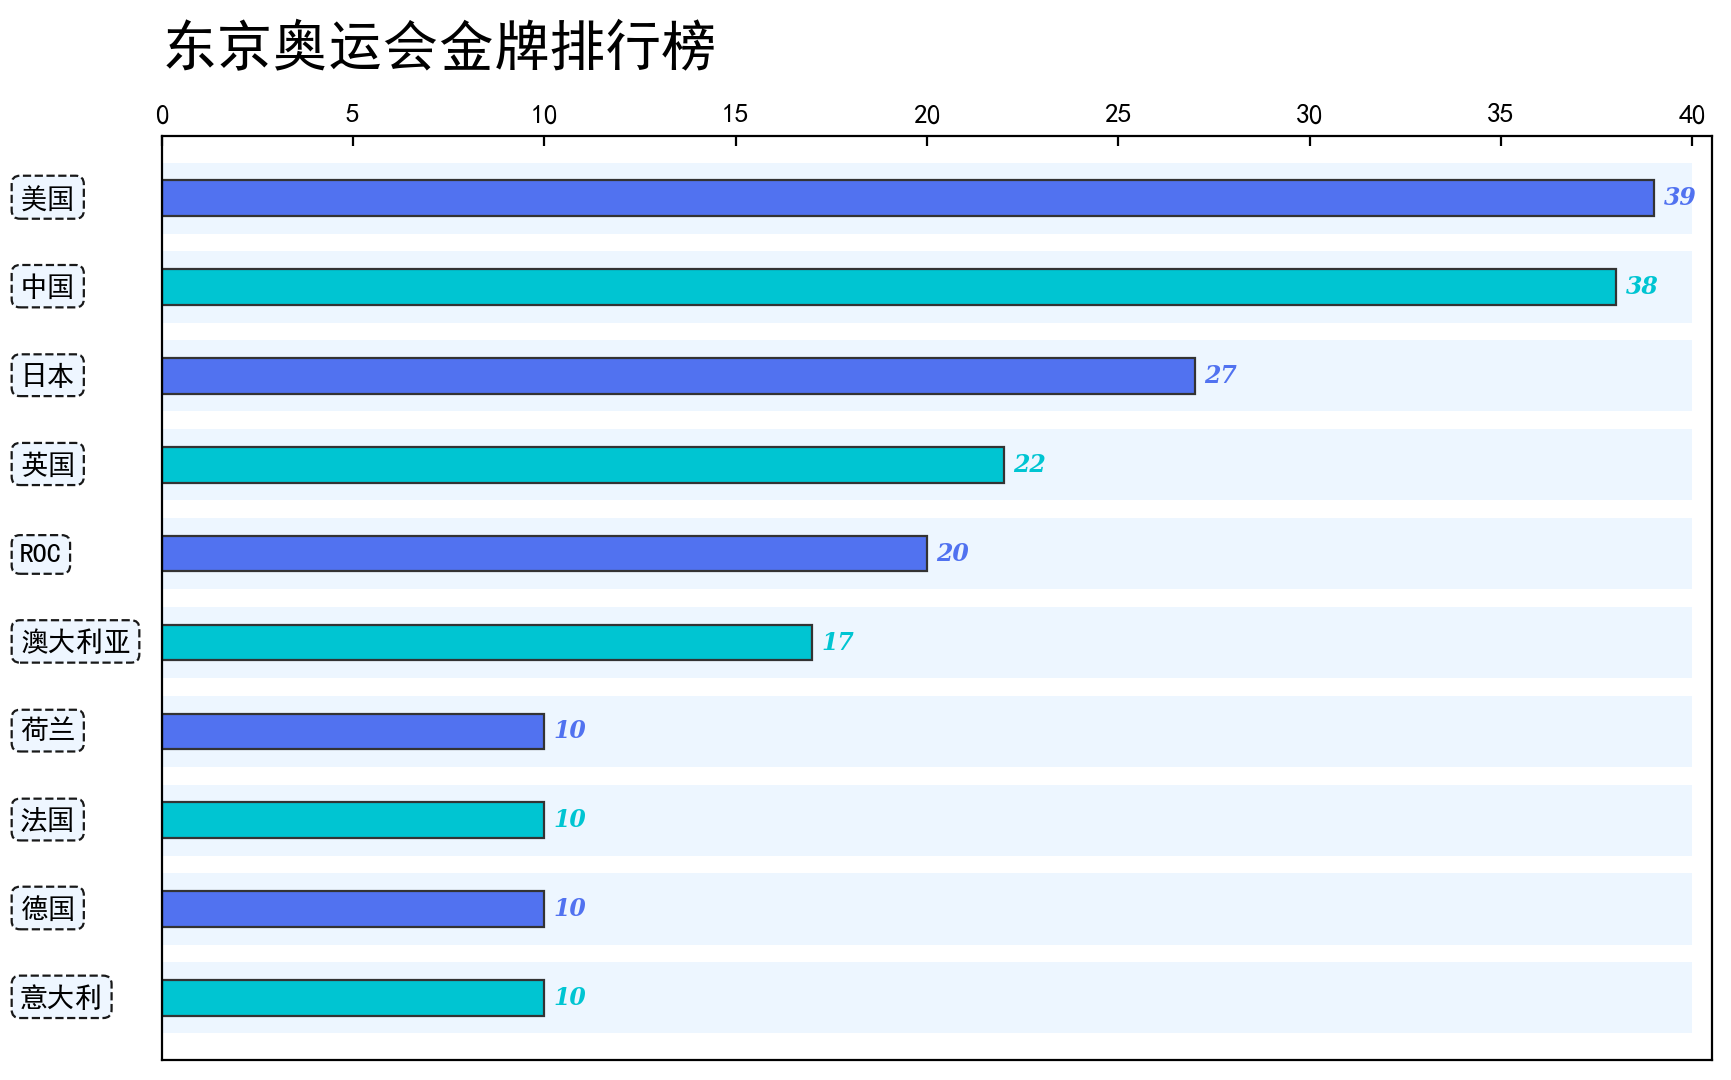

In [77]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['SimHei'] # 换字体

n = 10
x = [i for i in range(n)]  # 共有多少个数据就设置多少个i
y1 = [40] * n  # 这里是x轴最大范围，也就是浅色部分长度，需要根据你的数据进行修改
counts = list(df1.head(10)['金牌数'])
countrys = list(df1.head(10)['国家奥委会'])


plt.figure(figsize=(10, 6), dpi=100) # https://www.w3xue.com/exp/article/20191/19336.html

# https://www.delftstack.com/zh/howto/matplotlib/how-to-set-limit-for-axes-in-matplotlib/
# x（横）轴范围
plt.xlim(0, 40.5)  # 这里的1310修改成最大的x轴，比上面的y1大一点即可

# https://vimsky.com/examples/usage/matplotlib-pyplot-barh-function-in-python.html
plt.barh(x, y1, color='#EDF6FF', alpha=0.99) # 条形图，背后浅条

for i in range(n):
    plt.barh(x[i], # 纵轴
            counts[::-1][i], # 横轴，值，条形图从下到上画，所以倒着取值
            color='#00C5D2' if x[i] %2 == 0 else '#5172F0', # 奇数偶数各一个色
            height=0.4, # 条高
            ec='#333', # 边缘色
            lw=0.8) # 边缘or线的宽度

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
ax = plt.gca() # 移动坐标轴前置句

ax.xaxis.set_ticks_position('top') # 移动横轴到顶
ax.tick_params(direction='in') # 将刻度放在坐标区内

ax.tick_params(bottom=False, top=True, left=False, right=False) # 是否绘制相应的刻度，只绘制顶刻度

# https://vimsky.com/examples/usage/matplotlib-pyplot-yticks-in-python.html
plt.yticks([]) # 用于获取和设置y轴的当前刻度位置和标签，空列表作为参数传递，则它将删除所有 yticks

plt.ylim(-0.7, 9.7)# y（纵）轴范围
for i in range(n): # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

    plt.text(-3.7, 8.9-i, 
            f'{countrys[i]}', 
            bbox=dict(boxstyle="round", 
                        fc="#EDF6FF",
                        ec="black", 
                        alpha=0.9, 
                        linestyle='--', 
                        linewidth=0.8), 
            size=10)

    plt.text(counts[::-1][i]+0.25, i, 
            f"{counts[::-1][i]}", 
            fontsize=8.5, # 字号
            color='#00C5D2' if x[i] % 2 == 0 else '#5172F0', 
            verticalalignment='center', # va{'center', 'top', 'bottom', 'baseline', 'center_baseline'}
            style='italic', # 字体，斜体
            family='serif', # 字体 {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
            weight='heavy') # 字体粗细


plt.text(0, 10.5, '东京奥运会金牌排行榜', size=20)

plt.show()

### 19 - 堆叠图

将排行榜前十名的奖牌绘制堆叠图

- pyecharts 教程
    - https://www.heywhale.com/mw/project/5eb7958f366f4d002d783d4a
    - https://pyecharts.readthedocs.io/projects/pyecharts-en/zh/latest/zh-cn/charts_base/#bar

In [12]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
gold = list(df1['金牌数'].head(10))
silver = list(df1['银牌数'].head(10))
bronze = list(df1['铜牌数'].head(10))
countrys = list(df1['国家奥委会'].head(10))

c = (
    Bar()
    # 添加数据
    .add_xaxis(countrys) # stack1：调堆积图或柱状图
    .add_yaxis("金牌🏅️", gold, stack="stack1",color ="#8F3605" )
    .add_yaxis("银牌🥈", silver, stack="stack1", color="#838383")
    .add_yaxis("铜牌🥉", bronze, stack="stack1", color='#FBED67')
    # 设置标题、标签    https://blog.csdn.net/weixin_52720197/article/details/114736663
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False)) # 不显示数（标签）
    .set_global_opts(title_opts=opts.TitleOpts(title="东京奥运会榜10奖牌分布")) # 设置标题
)

c.render_notebook()

In [10]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType
gold = list(df1['金牌数'].head(10))
silver = list(df1['银牌数'].head(10))
bronze = list(df1['铜牌数'].head(10))
countrys = list(df1['国家奥委会'].head(10))

c = (
    Bar()
    .add_xaxis(countrys)
    .add_yaxis("金牌🏅️", gold, color ="#8F3605" )
    .add_yaxis("银牌🥈", silver,  color="#838383")
    .add_yaxis("铜牌🥉", bronze,  color='#FBED67')
    
    #.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(title_opts=opts.TitleOpts(title="东京奥运会榜10奖牌分布"))
)

c.render_notebook()

### 20 - 饼图

绘制中国队的奖牌分布饼图

In [53]:
data = pd.pivot_table(df2,values = ['奖牌类型'],index = ['国家','运动类别'],aggfunc = 'count').query("国家 == ['中国']")
data

奖牌类型
国家 运动类别        
中国 三人篮球       1
   举重         8
   乒乓球        7
   击剑         1
   古典式摔跤      1
   场地自行车赛     1
   射击        11
   帆船         2
   拳击         2
   攀岩         1
   游泳         6
   田径         4
   空手道        2
   竞技体操       8
   羽毛球        6
   自由式摔跤      3
   花样游泳       2
   赛艇         3
   跆拳道        1
   跳水        12
   蹦床体操       3
   静水皮划艇      3

In [14]:
data.index

MultiIndex([('中国',   '三人篮球'),
            ('中国',     '举重'),
            ('中国',    '乒乓球'),
            ('中国',     '击剑'),
            ('中国',  '古典式摔跤'),
            ('中国', '场地自行车赛'),
            ('中国',     '射击'),
            ('中国',     '帆船'),
            ('中国',     '拳击'),
            ('中国',     '攀岩'),
            ('中国',     '游泳'),
            ('中国',     '田径'),
            ('中国',    '空手道'),
            ('中国',   '竞技体操'),
            ('中国',    '羽毛球'),
            ('中国',  '自由式摔跤'),
            ('中国',   '花样游泳'),
            ('中国',     '赛艇'),
            ('中国',    '跆拳道'),
            ('中国',     '跳水'),
            ('中国',   '蹦床体操'),
            ('中国',  '静水皮划艇')],
           names=['国家', '运动类别'])

In [15]:
jiangpai = list(data['奖牌类型'])
xiangmu = [data.index[i][1] for i in range(len(data))]

In [27]:
from pyecharts import options as opts
from pyecharts.charts import Pie

c = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)) # 饼图（主题设置：LIGHT主题）   https://blog.csdn.net/qq_42374697/article/details/105747391
    .add(
        "",
        [list(z) for z in zip(xiangmu, jiangpai)],
        radius=["40%", "75%"], # 环范围
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="中国队奖牌分布"),
        legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%"), # 调图标位置
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render_notebook()
)
c

### 21 - 地图

绘制各国奖牌分布热力地图

In [34]:
# json 读写   https://python3-cookbook.readthedocs.io/zh_CN/latest/c06/p02_read-write_json_data.html
import json
countrys = list(df1['国家奥委会'])
data = list(df1['总分'])
with open('name_map.json','r',encoding='utf8')as fp:
    name = json.load(fp)

In [35]:
name

{'Singapore Rep.': '新加坡',
 'Dominican Rep.': '多米尼加',
 'Palestine': '巴勒斯坦',
 'Bahamas': '巴哈马',
 'Timor-Leste': '东帝汶',
 'Afghanistan': '阿富汗',
 'Guinea-Bissau': '几内亚比绍',
 'Côte dIvoire': '科特迪瓦',
 'Siachen Glacier': '锡亚琴冰川',
 'Br. Indian Ocean Ter.': '英属印度洋领土',
 'Angola': '安哥拉',
 'Albania': '阿尔巴尼亚',
 'United Arab Emirates': '阿联酋',
 'Argentina': '阿根廷',
 'Armenia': '亚美尼亚',
 'French Southern and Antarctic Lands': '法属南半球和南极领地',
 'Australia': '澳大利亚',
 'Austria': '奥地利',
 'Azerbaijan': '阿塞拜疆',
 'Burundi': '布隆迪',
 'Belgium': '比利时',
 'Benin': '贝宁',
 'Burkina Faso': '布基纳法索',
 'Bangladesh': '孟加拉国',
 'Bulgaria': '保加利亚',
 'The Bahamas': '巴哈马',
 'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',
 'Belarus': '白俄罗斯',
 'Belize': '伯利兹',
 'Bermuda': '百慕大',
 'Bolivia': '玻利维亚',
 'Brazil': '巴西',
 'Brunei': '文莱',
 'Bhutan': '不丹',
 'Botswana': '博茨瓦纳',
 'Central African Rep.': '中非',
 'Canada': '加拿大',
 'Switzerland': '瑞士',
 'Chile': '智利',
 'China': '中国',
 'Ivory Coast': '象牙海岸',
 'Cameroon': '喀麦隆',
 'Dem. Rep. Congo': '刚果民主共和国',
 'C

In [46]:
c = (
    Map()
    .add("", [list(z) for z in zip(countrys, data)], 
        "world", # 世界地图
        is_map_symbol_show=False, # 去掉地图标识小红点
        name_map=name) # 用 json 数据对应
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="东京奥运会奖牌分布"),
        visualmap_opts=opts.VisualMapOpts(max_=150), # 控制数据展示
    )
    .render_notebook()
)

c

###  22 - 动态图

将排行榜前十名的奖牌变化动态展示

In [61]:
! cd bar_chart_race-master;python setup.py install

ϵͳ�Ҳ���ָ����·����


In [47]:
import bar_chart_race as bcr

In [54]:
data = pd.pivot_table(df2,values = ['奖牌类型'],index = ['获奖时间','国家'],aggfunc = 'count').query("国家 == ['美国', '中国', '日本', '英国', 'ROC', '澳大利亚', '荷兰', '法国', '德国', '意大利']")
data = data.unstack()
data.columns = data.columns.get_level_values(1)
data.columns.name = None
data = data.cumsum()
data = data.fillna(axis=0,method='ffill').fillna(0)
data.columns = ['Russia', 'China','Italian', 'Japan', 'the Netherlands',' German ',' France ', 'Australia', 'US',' British ']

In [55]:
def time_format(x):
    x = x.replace('月','-')
    x = x.replace('日','')
    x = '2021-' + x
    return x
data = data.reset_index()
data['获奖时间'] = data['获奖时间'].map(time_format)
data['获奖时间'] = pd.to_datetime(data['获奖时间'])
data = data.set_index('获奖时间')

In [64]:
bcr.bar_chart_race(
    df=data,
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=30,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y-%m-%d',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total MEDALS: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=160,
    cmap='dark12',
    title='Tokyo 2021 Medal changes',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    #shared_fontdict={'family': 'Courier New', 'color': 'rebeccapurple'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

C:\Users\86159\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\86159\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            